In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [3]:

from keras.models import Sequential,load_model
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D


In [18]:
train='/content/drive/My Drive/DL_projects/data/train'
test='/content/drive/My Drive/DL_projects/data/test'

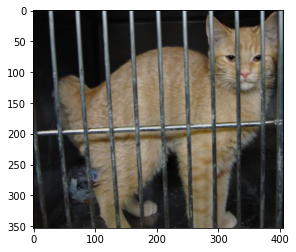

In [17]:
img = image.load_img('/content/drive/My Drive/DL_projects/data/train/cats/15.jpg')
plt.imshow(img)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


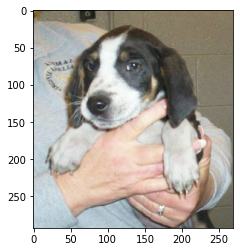

In [19]:
img2=image.load_img('/content/drive/My Drive/DL_projects/data/train/dogs/10.jpg')
plt.imshow(img2)

In [22]:
cv2.imread('/content/drive/My Drive/DL_projects/data/train/dogs/10.jpg').shape

(293, 269, 3)

In [23]:
train_data= ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_data= ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

In [25]:
train_dataset = train_data.flow_from_directory("/content/drive/My Drive/DL_projects/data/train",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary'
                                         )

Found 40 images belonging to 2 classes.


In [26]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
X, Y = train_dataset.next()

In [33]:
test_dataset = test_data.flow_from_directory("/content/drive/My Drive/DL_projects/data/test",
                                          target_size=(150,150),
                                          batch_size =64,
                                          class_mode = 'binary'
                                         )

Found 21 images belonging to 2 classes.


In [28]:
test_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [44]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))


opt = keras.optimizers.Nadam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
batch_normalization_12 (Batc (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
batch_normalization_13 (Batc (None, 69, 69, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 34, 34, 64)       

In [62]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=20, restore_best_weights=True)
history=model.fit_generator(train_dataset, epochs=50,validation_data = test_dataset,callbacks=[early_stop])

Epoch 1/50
2/2 [==============================] - 1s 639ms/step - loss: 0.6975 - accuracy: 0.6000 - val_loss: 0.7028 - val_accuracy: 0.4762
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.7039 - accuracy: 0.4000 - val_loss: 0.7040 - val_accuracy: 0.4762
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.7072 - accuracy: 0.5000 - val_loss: 0.7059 - val_accuracy: 0.4762
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 0.7201 - accuracy: 0.3500 - val_loss: 0.7128 - val_accuracy: 0.4762
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.7004 - accuracy: 0.4500 - val_loss: 0.6951 - val_accuracy: 0.3810
Epoch 6/50
2/2 [==============================] - 1s 537ms/step - loss: 0.6976 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.5238
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.6976 - accuracy: 0.6000 - val_loss: 0.6974 - val_accuracy: 0.4286
Epoch 8/50
2/2 [===================

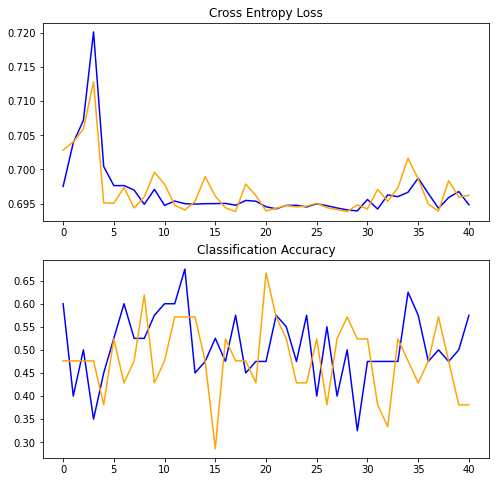

In [63]:

# plot diagnostic learning curves

def summarize_diagnostics(history):
	# plot loss
  plt.figure(figsize=(8,8))
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

# learning curves
summarize_diagnostics(history)

In [64]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150,3))
    
    plt.imshow(img1)
 
    img1= image.img_to_array(img1)
    img1=np.expand_dims(img1,axis=0)
    img1=np.array(img1)
    img1=img1/255
    
    val = model.predict_classes(img1)
    print(model.predict([img1])[0])
    print(val)
    if val.any() == 1:
      
        
      plt.xlabel("DOG",fontsize=30)
        
    
    elif val.any() == 0:
  
        
      plt.xlabel("CAT",fontsize=30)

    
    
    

[0.51440054 0.48559946]
[0]


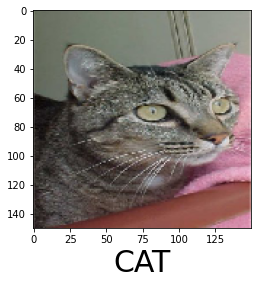

In [65]:
predictImage(r"/content/drive/My Drive/DL_projects/data/test/cats/104.jpg")

[0.45906776 0.54093224]
[1]


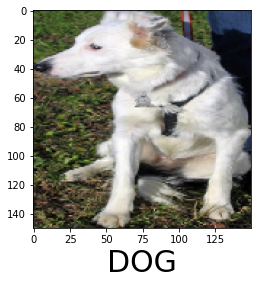

In [66]:
predictImage(r"/content/drive/My Drive/DL_projects/data/test/dogs/108.jpg")

[0.43974084 0.56025916]
[1]


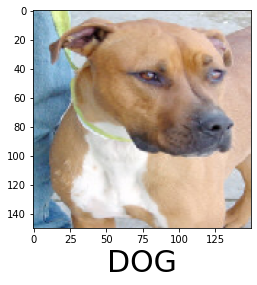

In [68]:
predictImage("/content/drive/My Drive/DL_projects/data/test/dogs/105.jpg")

[0.51540565 0.48459435]
[0]


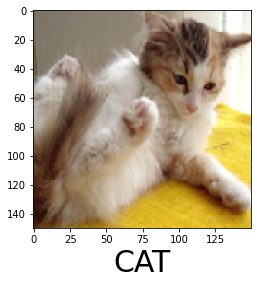

In [69]:
predictImage('/content/drive/My Drive/DL_projects/data/test/cats/105.jpg')

[0.46071592 0.53928417]
[1]


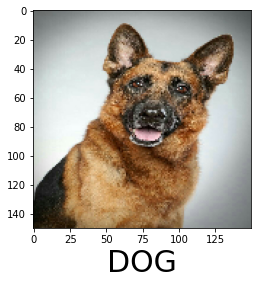

In [70]:
predictImage('/content/drive/My Drive/DL_projects/data/test/dogs/german_101.jpg')

[0.5006212  0.49937883]
[0]


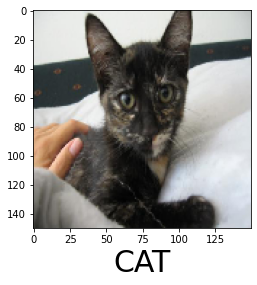

In [71]:
predictImage('/content/drive/My Drive/DL_projects/data/test/cats/109.jpg')